In [31]:
df=pd.read_csv("GOOGL.csv")

In [32]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


In [33]:
df['Date']=pd.to_datetime(df['Date'])

In [35]:
df.sort_values('Date',inplace=True)

In [36]:
closed_prices=df['Close'].values.reshape(-1,1)

In [37]:
closed_prices

array([[  50.220219],
       [  54.209209],
       [  54.754753],
       ...,
       [2797.360107],
       [2765.51001 ],
       [2831.439941]])

In [40]:
mss=MinMaxScaler(feature_range=(0,1))
mss.fit(closed_prices)
scaled_closed_prices=mss.transform(closed_prices)

In [41]:
scaled_closed_prices

array([[5.60505519e-05],
       [1.40975800e-03],
       [1.59489433e-03],
       ...,
       [9.32328062e-01],
       [9.21519383e-01],
       [9.43893427e-01]])

In [45]:
import numpy as np
def create_sequence(data,s_length=60):
  x,y=[],[]
  for i in range(s_length,len(data)):
    x.append(data[i-s_length:i,0])
    y.append(data[i,0])
  return np.array(x),np.array(y)


In [46]:
X,Y=create_sequence(scaled_closed_prices)

In [49]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [50]:
model=Sequential()

In [51]:
model.add(LSTM(50,input_shape=(x_train.shape[1],1),return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense_10 (Dense)            (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
model.fit(x_train,y_train,batch_size=20,epochs=32)

Epoch 1/32
175/175 [==============================] - 8s 28ms/step - loss: 0.0082
Epoch 2/32
175/175 [==============================] - 4s 22ms/step - loss: 1.3384e-04
Epoch 3/32
175/175 [==============================] - 4s 22ms/step - loss: 1.2305e-04
Epoch 4/32
175/175 [==============================] - 5s 28ms/step - loss: 1.3360e-04
Epoch 5/32
175/175 [==============================] - 5s 28ms/step - loss: 1.2388e-04
Epoch 6/32
175/175 [==============================] - 4s 22ms/step - loss: 1.5134e-04
Epoch 7/32
175/175 [==============================] - 5s 28ms/step - loss: 1.2252e-04
Epoch 8/32
175/175 [==============================] - 4s 22ms/step - loss: 1.3573e-04
Epoch 9/32
175/175 [==============================] - 4s 21ms/step - loss: 1.0197e-04
Epoch 10/32
175/175 [==============================] - 5s 27ms/step - loss: 1.0105e-04
Epoch 11/32
175/175 [==============================] - 5s 27ms/step - loss: 1.0549e-04
Epoch 12/32
175/175 [==============================] - 4

In [54]:
y_pred=model.predict(x_test)
y_pred=mss.inverse_transform(y_pred)

28/28 [==============================] - 1s 12ms/step


In [55]:
y_actual=mss.inverse_transform(y_test.reshape(-1,1))

In [56]:
y_actual

array([[ 329.854858],
       [ 189.434433],
       [ 210.460464],
       [ 187.287292],
       [1182.27002 ],
       [ 254.259262],
       [ 234.77478 ],
       [ 670.150024],
       [1409.390015],
       [1201.26001 ],
       [ 704.25    ],
       [ 601.630005],
       [2491.560059],
       [ 209.689697],
       [ 261.436432],
       [1777.859985],
       [ 537.027039],
       [ 271.861847],
       [ 323.953949],
       [ 284.394409],
       [ 550.030029],
       [1211.449951],
       [2060.120117],
       [ 245.475479],
       [1484.689941],
       [ 753.409973],
       [ 173.628632],
       [ 513.568542],
       [ 313.128113],
       [  85.075073],
       [ 227.092087],
       [ 372.652649],
       [ 337.912903],
       [1240.030029],
       [ 761.599976],
       [1487.040039],
       [1761.420044],
       [ 230.510513],
       [ 144.064056],
       [1576.25    ],
       [ 570.450012],
       [ 938.929993],
       [ 235.2052  ],
       [ 396.841827],
       [ 312.007019],
       [ 1

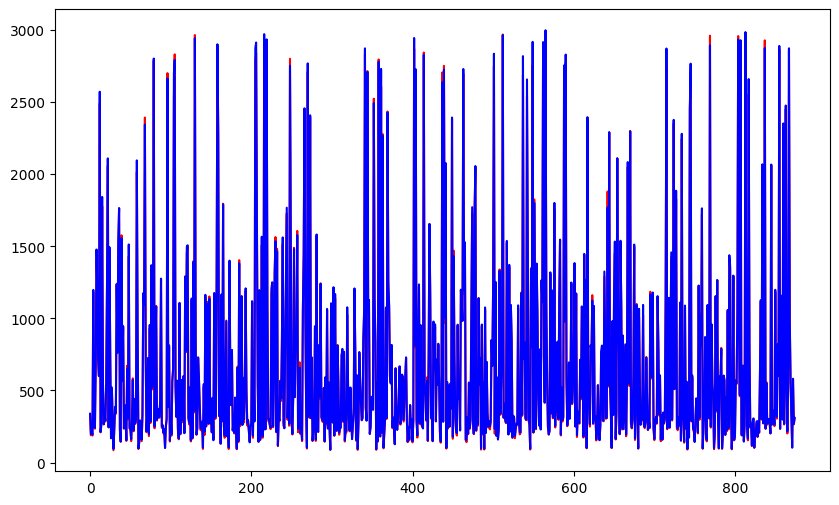

In [57]:
plt.figure(figsize=(10,6))
plt.plot(y_actual,color='red',label='Actual')
plt.plot(y_pred,color='blue',label='predicted')